In [2]:
%pylab inline
import h5py
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [62]:
path = '/home/arodriguez/BACCO/bias-voids/IATE/fields_smooth/k0.75_4f/Models/voids/'


m3 = pd.read_csv(path+'voids_3_rmin_16.dat')
m6 = pd.read_csv(path+'voids_6_rmin_16.dat')
m9 = pd.read_csv(path+'voids_9_rmin_16.dat')
m12 = pd.read_csv(path+'voids_12_rmin_16.dat')
m15 = pd.read_csv(path+'voids_15_rmin_16.dat')
m18 = pd.read_csv(path+'voids_18_rmin_16.dat')

v0 = pd.read_csv('voids_0.dat')
v3 = pd.read_csv('voids_3.dat')
v6 = pd.read_csv('voids_6.dat')
v9 = pd.read_csv('voids_9.dat')
v12 = pd.read_csv('voids_12.dat')
v15 = pd.read_csv('voids_15.dat')
v18 = pd.read_csv('voids_18.dat')

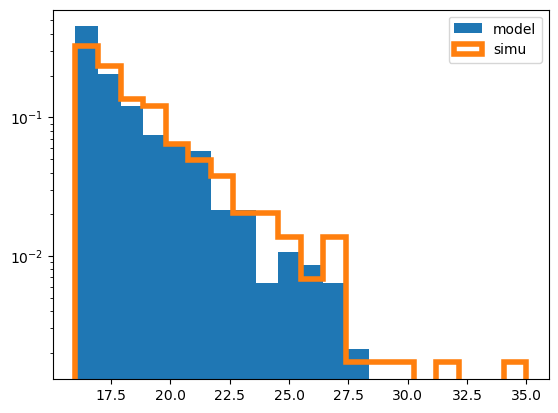

In [40]:
rmin = 16
rmax = np.max(v15['r'].values)
nbines = len(np.arange(rmin,rmax+1))

plt.hist(m15['r'], bins=nbines, range=(rmin, rmax) , label = 'model',density=True)
plt.hist(v15['r'], bins=nbines, range=(rmin, rmax) , histtype='step', lw = 4, label='simu' ,density=True)
plt.semilogy()
plt.legend()

Text(0, 0.5, 'Sizes distribution')

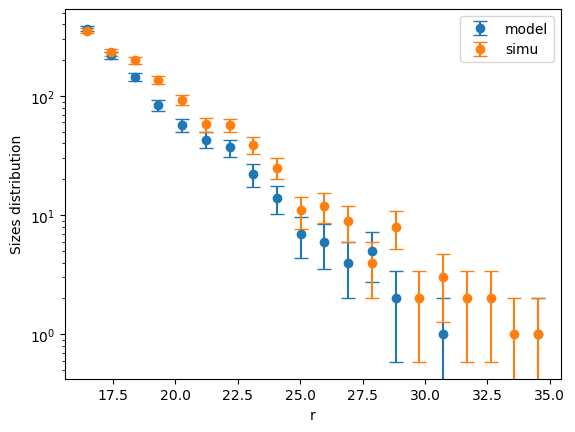

In [36]:
# Parámetros
rmin = 16
rmax = np.max(v12['r'].values)
nbines = len(np.arange(rmin, rmax + 1))

# Calculamos los histogramas y sus errores
hist_model, bin_edges = np.histogram(m12['r'], bins=nbines, range=(rmin, rmax))
hist_simu, _ = np.histogram(v12['r'], bins=nbines, range=(rmin, rmax))

errors_model = np.sqrt(hist_model)  # Errores Poisson para 'model'
errors_simu = np.sqrt(hist_simu)   # Errores Poisson para 'simu'

# Coordenadas de los centros de los bins
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Graficamos
plt.errorbar(bin_centers, hist_model, yerr=errors_model, fmt='o', label='model', capsize=5, color='C0')
plt.errorbar(bin_centers, hist_simu, yerr=errors_simu, fmt='o', label='simu', capsize=5, color='C1')
plt.semilogy()
#plt.semilogx()
# Configuración del gráfico
plt.legend()
plt.xlabel('r')
plt.ylabel('Sizes distribution')

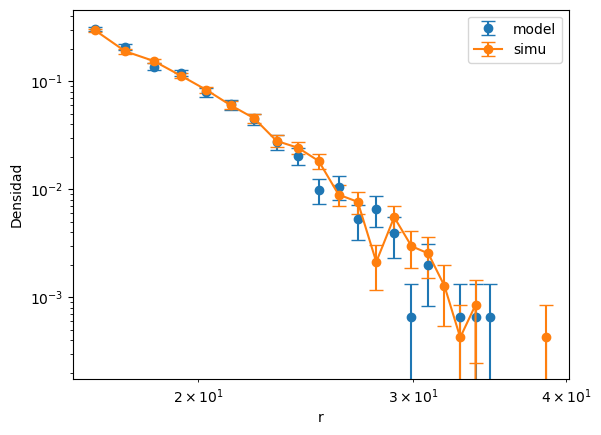

In [47]:
# Parámetros
rmin = 16
rmax = np.max(v9['r'].values)
nbines = len(np.arange(rmin, rmax + 1))

# Calculamos histogramas y errores normalizados
hist_model, bin_edges = np.histogram(m9['r'], bins=nbines, range=(rmin, rmax))
hist_simu, _ = np.histogram(v9['r'], bins=nbines, range=(rmin, rmax))

bin_width = bin_edges[1] - bin_edges[0]  # Ancho de cada bin
total_model = np.sum(hist_model)  # Total de datos en 'model'
total_simu = np.sum(hist_simu)    # Total de datos en 'simu'

# Normalizamos los histogramas
hist_model_density = hist_model / (total_model * bin_width)
hist_simu_density = hist_simu / (total_simu * bin_width)

# Calculamos los errores Poisson normalizados
errors_model = np.sqrt(hist_model) / (total_model * bin_width)
errors_simu = np.sqrt(hist_simu) / (total_simu * bin_width)

# Coordenadas de los centros de los bins
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Graficamos los histogramas con barras de error
plt.errorbar(bin_centers, hist_model_density, yerr=errors_model, fmt='o', label='model', capsize=5, color='C0')
plt.errorbar(bin_centers, hist_simu_density, yerr=errors_simu, fmt='o', label='simu', capsize=5, color='C1', linestyle='-')

# Configuración del gráfico
plt.semilogy()
plt.semilogx()
plt.xlabel('r')
plt.ylabel('Densidad')
plt.legend()

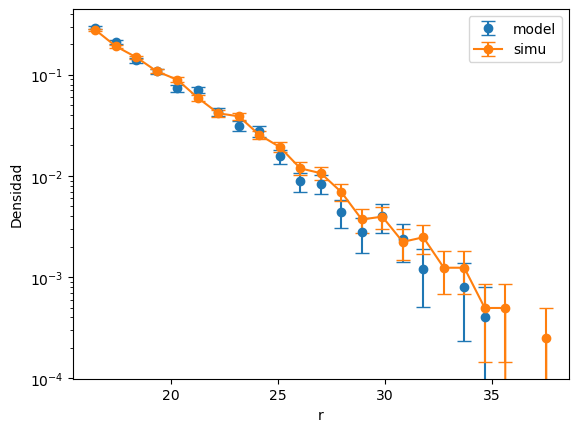

In [68]:
def distributions(simu, model, rmin = 16):
    # Parámetros
    rmax = np.max(simu.values)
    nbines = len(np.arange(rmin, rmax + 1))

    # Calculamos histogramas y errores normalizados
    hist_model, bin_edges = np.histogram(model, bins=nbines, range=(rmin, rmax))
    hist_simu, _ = np.histogram(simu, bins=nbines, range=(rmin, rmax))

    bin_width = bin_edges[1] - bin_edges[0]  # Ancho de cada bin
    total_model = np.sum(hist_model)  # Total de datos en 'model'
    total_simu = np.sum(hist_simu)    # Total de datos en 'simu'

    # Normalizamos los histogramas
    hist_model_density = hist_model / (total_model * bin_width)
    hist_simu_density = hist_simu / (total_simu * bin_width)

    # Calculamos los errores Poisson normalizados
    errors_model = np.sqrt(hist_model) / (total_model * bin_width)
    errors_simu = np.sqrt(hist_simu) / (total_simu * bin_width)

    # Coordenadas de los centros de los bins
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    return bin_centers, hist_model_density, errors_model, hist_simu_density, errors_simu

2.9073219221498845


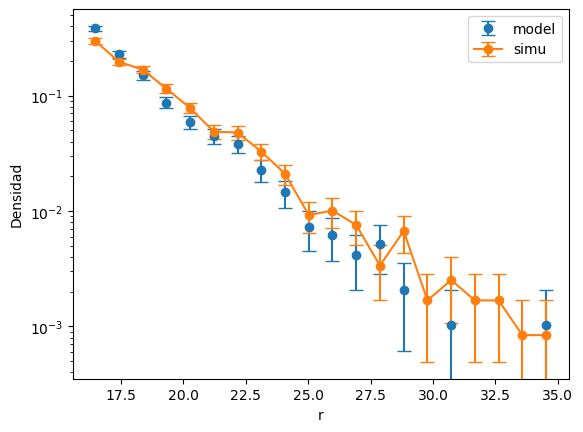

In [108]:
bin_centers, hist_model_density, errors_model, hist_simu_density, errors_simu = distributions(v12['r'],m12['r'])
# Graficamos los histogramas con barras de error
plt.errorbar(bin_centers, hist_model_density, yerr=errors_model, fmt='o', label='model', capsize=5, color='C0')
plt.errorbar(bin_centers, hist_simu_density, yerr=errors_simu, fmt='o', label='simu', capsize=5, color='C1', linestyle='-')

# Configuración del gráfico
plt.semilogy()
#plt.semilogx()
plt.xlabel('r')
plt.ylabel('Densidad')
plt.legend()

valid_bins = errors_model > 0
chi2 = np.sum((hist_simu_density[valid_bins] - hist_model_density[valid_bins]) ** 2 / errors_model[valid_bins] ** 2)
degrees_of_freedom = nbines - 1  # Ajustar si el modelo tiene parámetros
chi2_reduced = chi2 / degrees_of_freedom
print(chi2_reduced)

In [100]:
def chi_squared_reduced(x1, y1, ex1, ey1, x2, y2, ex2, ey2):
    # Diferencia entre los datos reales y el modelo en y
    residual_y = y1 - y2
    # Diferencia entre los datos reales y el modelo en x
    residual_x = x1 - x2

    # Error combinado en y (datos reales y modelo)
    error_y = np.sqrt(ey1**2 + ey2**2)
    # Error combinado en x (datos reales y modelo)
    error_x = np.sqrt(ex1**2 + ex2**2)

    # Calculo de chi cuadrado para y
    chi2_y = np.sum((residual_y ** 2) / (error_y ** 2))
    # Calculo de chi cuadrado para x
    chi2_x = np.sum((residual_x ** 2) / (error_x ** 2))

    # Calculo total de chi cuadrado
    chi2 = chi2_y + chi2_x

    # Grados de libertad (N - 2)
    degrees_of_freedom = len(x1) - 2

    # Chi cuadrado reducido
    chi2_reduced = chi2 / degrees_of_freedom

    return chi2, chi2_reduced

In [101]:
#hist_model_density, errors_model, hist_simu_density, errors_simu
x1 = bin_centers
ex1 = np.ones(len(bin_centers))#*0.5
y1 = hist_simu_density
ey1 = errors_simu
x2 = bin_centers
ex2 = np.ones(len(bin_centers))#*0.5
y2 = hist_model_density
ey2 = errors_model


sel, = np.where((ey2+ey1 > 0) & (x1 < 22))
# Llamada a la función con tus datos
chi2, chi2_reduced = chi_squared_reduced(x1[sel], y1[sel], ex1[sel], ey1[sel], x2[sel], y2[sel], ex2[sel], ey2[sel])

print(f"Chi2: {chi2}")
print(f"Chi2 reducido: {chi2_reduced}")

Chi2: 4.566955952978833
Chi2 reducido: 1.1417389882447082
